# IMDB Movie Recommendations Based on Users' and Critics' Reviews

# Question: IMDB wants to identify similar movies based on movie's characteristics. How to accomplish this?

## Methodology: 
Need to do clustering with K-means and 'Minibatch'. Join the ratings with the 'movies': Use pd.merge

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

 Data set: Kaggle ~ https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer

import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

## Combine Data Sets

In [5]:
movies = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb movies.csv')
names = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb names.csv')
ratings = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb ratings.csv')
# Not useful: title_principals = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb title_principals.csv')

## Exploratory Data Analysis
### Univariate Analysis:
Our data set has 81,273 records/datapoints before dropping columns with missing values. We have 70 variables.  
Which variables are continuous and which are categorical?
We have missing data in the 'language','reviews_from_critics' columns. 
If so, how much?

In [6]:
movie_recs = pd.merge(movies, ratings, on='imdb_title_id')
movie_recs

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,5.6,6.0,6.7,3.0,2.0,4.0,5.0,14.0,7.1,45.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [4]:
movie_recs.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

## Missing Values
total_missing = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [5]:
total_missing = movie_recs.isnull().sum().sort_values(ascending=False)
percent_missing = (movie_recs.isnull().sum()/movie_recs.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing,percent_missing], axis =1)
missing_data.head(20)

,0,1
metascore,68551,0.843466
usa_gross_income,66179,0.814280
females_0age_avg_vote,65940,0.811340
females_0age_votes,65940,0.811340
males_0age_avg_vote,60934,0.749745
males_0age_votes,60934,0.749745
budget,58469,0.719415
allgenders_0age_avg_vote,54730,0.673409
allgenders_0age_votes,54730,0.673409
worlwide_gross_income,51381,0.632203


## Principal Component Analysis
Given that we have identified missing values, we still have over 30 columns of potential features that overlap in their influencing how to inform our target, which will be movie title based on a similarity learning model that derives from clustered score and review types.  We will review the types of data types across columns in two groups (1-13) and (6-55) to identify which columns should be dropped and differentiate between columns are are ordinal, like the different scores from the nominal types, number of reviews where ranking is meaningless. 

In [6]:
movie_recs.head().iloc[:,:13]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be..."
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse..."
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ..."
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L..."
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,..."


In [7]:
movie_recs.head().iloc[:,6:20]

,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore
0,70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN
1,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN
2,100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN
3,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN
4,60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN


### Principal Component Analysis: PCA
Reduce features as linear combinations of the original variables. First mean normalize the observations within dataset. 

In [8]:
#Create a series from our 'movie_recs' dataframe that drops redundant scoring columns that will not inform our similarity model. 
movie_recs1 = movie_recs.iloc[:,[14,15,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35]].dropna()

In [9]:
#Movie_recs1 series is more manageable to undertake our PCA. 
movie_recs1

,avg_vote,votes,reviews_from_users,reviews_from_critics,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
0,6.1,537,7.0,7.0,537,6.3,6.0,54,17,55,121,122,98,25,18,12,15
1,5.9,171,4.0,2.0,171,6.1,6.0,5,6,17,41,52,24,14,5,4,3
2,5.2,420,24.0,3.0,420,5.2,5.0,12,8,16,60,89,111,58,26,24,16
3,7.0,2019,28.0,14.0,2019,6.9,7.0,194,208,386,571,308,153,59,37,19,84
4,5.7,438,12.0,5.0,438,5.8,6.0,28,15,42,75,114,70,28,18,15,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81262,4.6,171,2.0,1.0,171,4.9,5.0,10,8,12,19,20,25,18,22,10,27
81263,6.1,163,7.0,1.0,163,6.4,7.0,18,9,13,42,36,21,11,3,2,8
81264,8.0,367,59.0,1.0,367,8.5,10.0,231,41,21,13,14,10,1,1,5,30
81265,5.0,260,20.0,3.0,260,6.5,8.0,90,27,21,15,7,16,15,10,11,48


In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [11]:
#Define X_1 variables as all types of votes and movie review scores 
    #to compare with an alternative 'X' for our similarity models of clustering.

    ##X_1 = movie_recs1.iloc[:, 20:55] -- before dropping
X_1 = movie_recs1.iloc[:, 0:55]

In [12]:
#normalize X_1
#Pre-Processing: Normalize the data. But in this case, the scores are rated on the same scale. 
#X_norm = normalize(X_1)
scaled_data = preprocessing.scale(X_1)  

#or: StandardScalar().fit_transform()

In [13]:
X_1

,avg_vote,votes,reviews_from_users,reviews_from_critics,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
0,6.1,537,7.0,7.0,537,6.3,6.0,54,17,55,121,122,98,25,18,12,15
1,5.9,171,4.0,2.0,171,6.1,6.0,5,6,17,41,52,24,14,5,4,3
2,5.2,420,24.0,3.0,420,5.2,5.0,12,8,16,60,89,111,58,26,24,16
3,7.0,2019,28.0,14.0,2019,6.9,7.0,194,208,386,571,308,153,59,37,19,84
4,5.7,438,12.0,5.0,438,5.8,6.0,28,15,42,75,114,70,28,18,15,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81262,4.6,171,2.0,1.0,171,4.9,5.0,10,8,12,19,20,25,18,22,10,27
81263,6.1,163,7.0,1.0,163,6.4,7.0,18,9,13,42,36,21,11,3,2,8
81264,8.0,367,59.0,1.0,367,8.5,10.0,231,41,21,13,14,10,1,1,5,30
81265,5.0,260,20.0,3.0,260,6.5,8.0,90,27,21,15,7,16,15,10,11,48


### Observation: 
We have dropped 14,770 observations from our dataset to 66,503 for our "X_1" representing reduced dimensions from our first run of PCA. 

We will run another similarity model to compare. For our "X_2" we will drop votes', budget', usa_gross_income', 'metascore' but included all types of votes.

In [13]:
#X_pca = movie_recs1.head().iloc[:,20:37] #Dropped 'votes', budget', usa_gross_income', 'metascore'
#Included all types of votes

X_2 = movie_recs1.iloc[:,0:17]
X_2

,avg_vote,votes,reviews_from_users,reviews_from_critics,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
0,6.1,537,7.0,7.0,537,6.3,6.0,54,17,55,121,122,98,25,18,12,15
1,5.9,171,4.0,2.0,171,6.1,6.0,5,6,17,41,52,24,14,5,4,3
2,5.2,420,24.0,3.0,420,5.2,5.0,12,8,16,60,89,111,58,26,24,16
3,7.0,2019,28.0,14.0,2019,6.9,7.0,194,208,386,571,308,153,59,37,19,84
4,5.7,438,12.0,5.0,438,5.8,6.0,28,15,42,75,114,70,28,18,15,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81262,4.6,171,2.0,1.0,171,4.9,5.0,10,8,12,19,20,25,18,22,10,27
81263,6.1,163,7.0,1.0,163,6.4,7.0,18,9,13,42,36,21,11,3,2,8
81264,8.0,367,59.0,1.0,367,8.5,10.0,231,41,21,13,14,10,1,1,5,30
81265,5.0,260,20.0,3.0,260,6.5,8.0,90,27,21,15,7,16,15,10,11,48


In [14]:
#normalize X_2
#Pre-Processing: Normalize the data. But in this case, the scores are rated on the same scale. 

scaled_data = preprocessing.scale(X_2) 

In [16]:
## We get the components by calling fit_transform method with our data
    #~ pca_components = pca.fit_transform(X)
pca_two_dim = PCA(2)
X_pca = pca_two_dim.fit_transform(preprocessing.scale(X_2))

In [17]:
sum(pca_two_dim.explained_variance_ratio_)

0.7651905701776547

### Observation:
We see that our reduced two-dimensions of analysis that have been scaled from the preceding line have a variance ratio of 76.51 percent regarding our 66,503 observations.

In [18]:
X_pca

array([[-0.79209719, -0.12707572],
       [-0.86613541,  0.0434858 ],
       [-0.90610556,  1.15023088],
       ...,
       [-0.41728195, -3.44427836],
       [-0.78311068, -0.48589255],
       [-0.16147708, -4.02052834]])

### Try 3 Dimensions
We will apply PCA for three dimensions across our selected features represented as 'X_2'. 

In [19]:
pca_three_dim = PCA(3)
X_pca1 = pca_three_dim.fit_transform(preprocessing.scale(X_2))

In [20]:
X_pca1.shape

(66503, 3)

In [22]:
print(len(X_pca1))

66503


In [23]:
sum(pca_three_dim.explained_variance_ratio_)

0.8830132106364582

### Observation:
We see that our reduced three-dimensions of analysis, which have also been scaled, have a variance ratio of 88.3 percent regarding our 66,503 observations. 

### Visual: PCA Plot

Text(0.5, 1.0, 'PCA of Two-dimensions Versus Three-Dimensions')

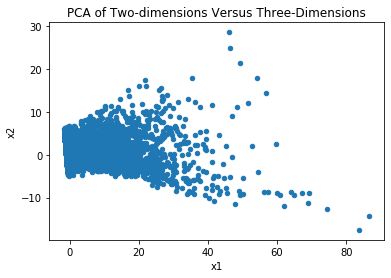

In [21]:
pd.DataFrame(X_pca, columns=['x1', 'x2']).plot.scatter(x='x1', y='x2')
plt.title('PCA of Two-dimensions Versus Three-Dimensions')

### Outliers
Look for outliers using boxplot and histogram.

In [22]:
movie_recs.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000,81273.000000,8.127300e+04,81273.000000,...,80409.000000,80409.000000,78701.000000,78701.000000,80667.000000,80667.000000,81034.000000,81034.000000,81269.000000,81269.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758,5.926587,9.421771e+03,6.259578,...,6.103064,635.330672,6.064022,184.702024,5.139347,77.299974,5.967583,1676.121468,5.775737,4371.879487
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764,1.243315,5.220245e+04,1.161615,...,1.452682,3350.118823,1.542429,771.842552,1.315429,127.173472,1.322301,8450.086745,1.295955,23093.245801
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,1.000000,9.900000e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000,5.200000,2.060000e+02,5.600000,...,5.300000,10.000000,5.300000,6.000000,4.300000,12.000000,5.200000,24.000000,5.100000,97.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000,6.100000,4.950000e+02,6.400000,...,6.300000,27.000000,6.300000,16.000000,5.300000,28.000000,6.200000,84.500000,6.000000,233.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000,6.800000,1.865000e+03,7.100000,...,7.000000,111.000000,7.000000,63.000000,6.000000,77.000000,6.900000,362.000000,6.700000,895.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000,10.000000,2.159628e+06,10.000000,...,10.000000,114034.000000,10.000000,30244.000000,10.000000,936.000000,10.000000,341457.000000,10.000000,862970.000000


In [23]:
movie_recs['genre']

0          Biography, Crime, Drama
1                            Drama
2                   Drama, History
3        Adventure, Drama, Fantasy
4                 Biography, Drama
                   ...            
81268             Horror, Thriller
81269                        Drama
81270                        Drama
81271                        Drama
81272                Drama, Family
Name: genre, Length: 81273, dtype: object

In [24]:
movie_recs['reviews_from_critics'].dtype

dtype('float64')

In [25]:
movie_recs['reviews_from_critics'].mean

<bound method Series.mean of 0         7.0
1         2.0
2         3.0
3        14.0
4         5.0
         ... 
81268     NaN
81269     NaN
81270     NaN
81271     NaN
81272     NaN
Name: reviews_from_critics, Length: 81273, dtype: float64>

In [26]:
#Without all variables but the 'review from critics'
new_series = movie_recs['reviews_from_critics'].dropna()

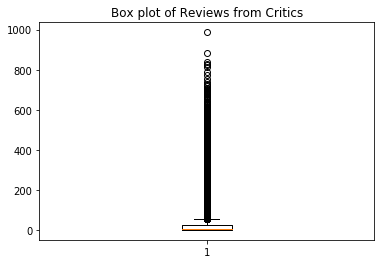

In [27]:
#Look for outliers
plt.boxplot(new_series)
plt.title("Box plot of Reviews from Critics")
plt.show()

In [28]:
movie_recs["reviews_from_critics"]

0         7.0
1         2.0
2         3.0
3        14.0
4         5.0
         ... 
81268     NaN
81269     NaN
81270     NaN
81271     NaN
81272     NaN
Name: reviews_from_critics, Length: 81273, dtype: float64

In [29]:
#Without all variables but the 'females_allages_avg_vote'
new_series2 = movie_recs['females_allages_avg_vote'].dropna()

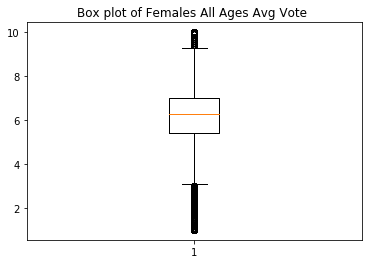

In [30]:
plt.boxplot(new_series2)
plt.title("Box plot of Females All Ages Avg Vote ")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


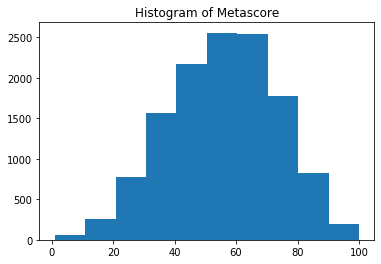

In [31]:
plt.hist(movie_recs["metascore"])
plt.title("Histogram of Metascore")
plt.show()

## Bivariate Analysis

In [32]:
movie_recs1.corr()

,avg_vote,votes,reviews_from_users,reviews_from_critics,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
avg_vote,1.000000,0.184369,0.154360,0.201977,0.184369,0.948743,0.903102,0.143432,0.163366,0.200058,0.199016,0.150866,0.097957,0.055798,0.023675,-0.001008,0.000064
votes,0.184369,1.000000,0.791431,0.674452,1.000000,0.164167,0.140451,0.858069,0.913433,0.958912,0.908024,0.783687,0.698546,0.649344,0.625239,0.606975,0.598915
reviews_from_users,0.154360,0.791431,1.000000,0.697933,0.791431,0.131085,0.115224,0.665943,0.654995,0.707518,0.732786,0.700832,0.676788,0.666404,0.670316,0.665386,0.653497
reviews_from_critics,0.201977,0.674452,0.697933,1.000000,0.674452,0.157232,0.139973,0.394931,0.458329,0.628626,0.750173,0.759804,0.726474,0.693415,0.662344,0.623134,0.520776
total_votes,0.184369,1.000000,0.791431,0.674452,1.000000,0.164167,0.140451,0.858069,0.913433,0.958912,0.908024,0.783687,0.698546,0.649344,0.625239,0.606975,0.598915
mean_vote,0.948743,0.164167,0.131085,0.157232,0.164167,1.000000,0.958109,0.134248,0.151646,0.183509,0.176514,0.122989,0.067139,0.024526,-0.006437,-0.028810,-0.017510
median_vote,0.903102,0.140451,0.115224,0.139973,0.140451,0.958109,1.000000,0.117177,0.129862,0.155108,0.149239,0.106386,0.060689,0.024372,-0.003980,-0.026521,-0.021124
votes_10,0.143432,0.858069,0.665943,0.394931,0.858069,0.134248,0.117177,1.000000,0.937655,0.782172,0.593154,0.436213,0.376993,0.355253,0.363583,0.384274,0.499962
votes_9,0.163366,0.913433,0.654995,0.458329,0.913433,0.151646,0.129862,0.937655,1.000000,0.907161,0.687308,0.482045,0.395990,0.364458,0.366284,0.382326,0.459397
votes_8,0.200058,0.958912,0.707518,0.628626,0.958912,0.183509,0.155108,0.782172,0.907161,1.000000,0.891389,0.682994,0.559005,0.500103,0.477529,0.467432,0.479524


### Visualizing Categorical Variables
Possible, but unnecessary in creating a wordcloud.

#### Plot counts for each combination of genres.
sns.countplot(y="females_allages_avg_vote", hue="genre", data=movie_recs, palette="Greens_d")
plt.show()

Text(0.5, 1.0, "Metascore vs Top 1,000 Voters' Ratings")

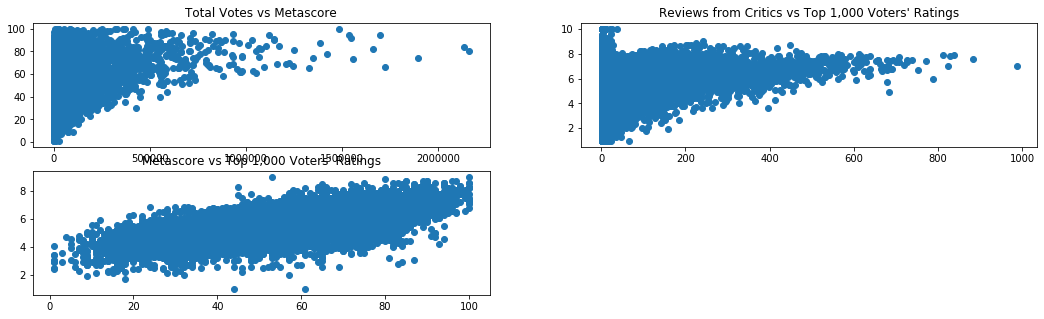

In [33]:
#Bivariate Analysis of 2 continuous variables: total_votes, metascore, top1000_voters_rating',"reviews_from_critics"
for i in range(0, len(movie_recs.total_votes)):
    if pd.isnull(movie_recs.total_votes[i]):
        movie_recs.total_votes[i] = movie_recs.total_votes[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(2,2,1)
plt.scatter(movie_recs["total_votes"], movie_recs["metascore"])
plt.title("Total Votes vs Metascore")

plt.subplot(2,2,2)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")

plt.subplot(2,2,3)
plt.scatter(movie_recs["metascore"], movie_recs["top1000_voters_rating"])
plt.title("Metascore vs Top 1,000 Voters' Ratings")

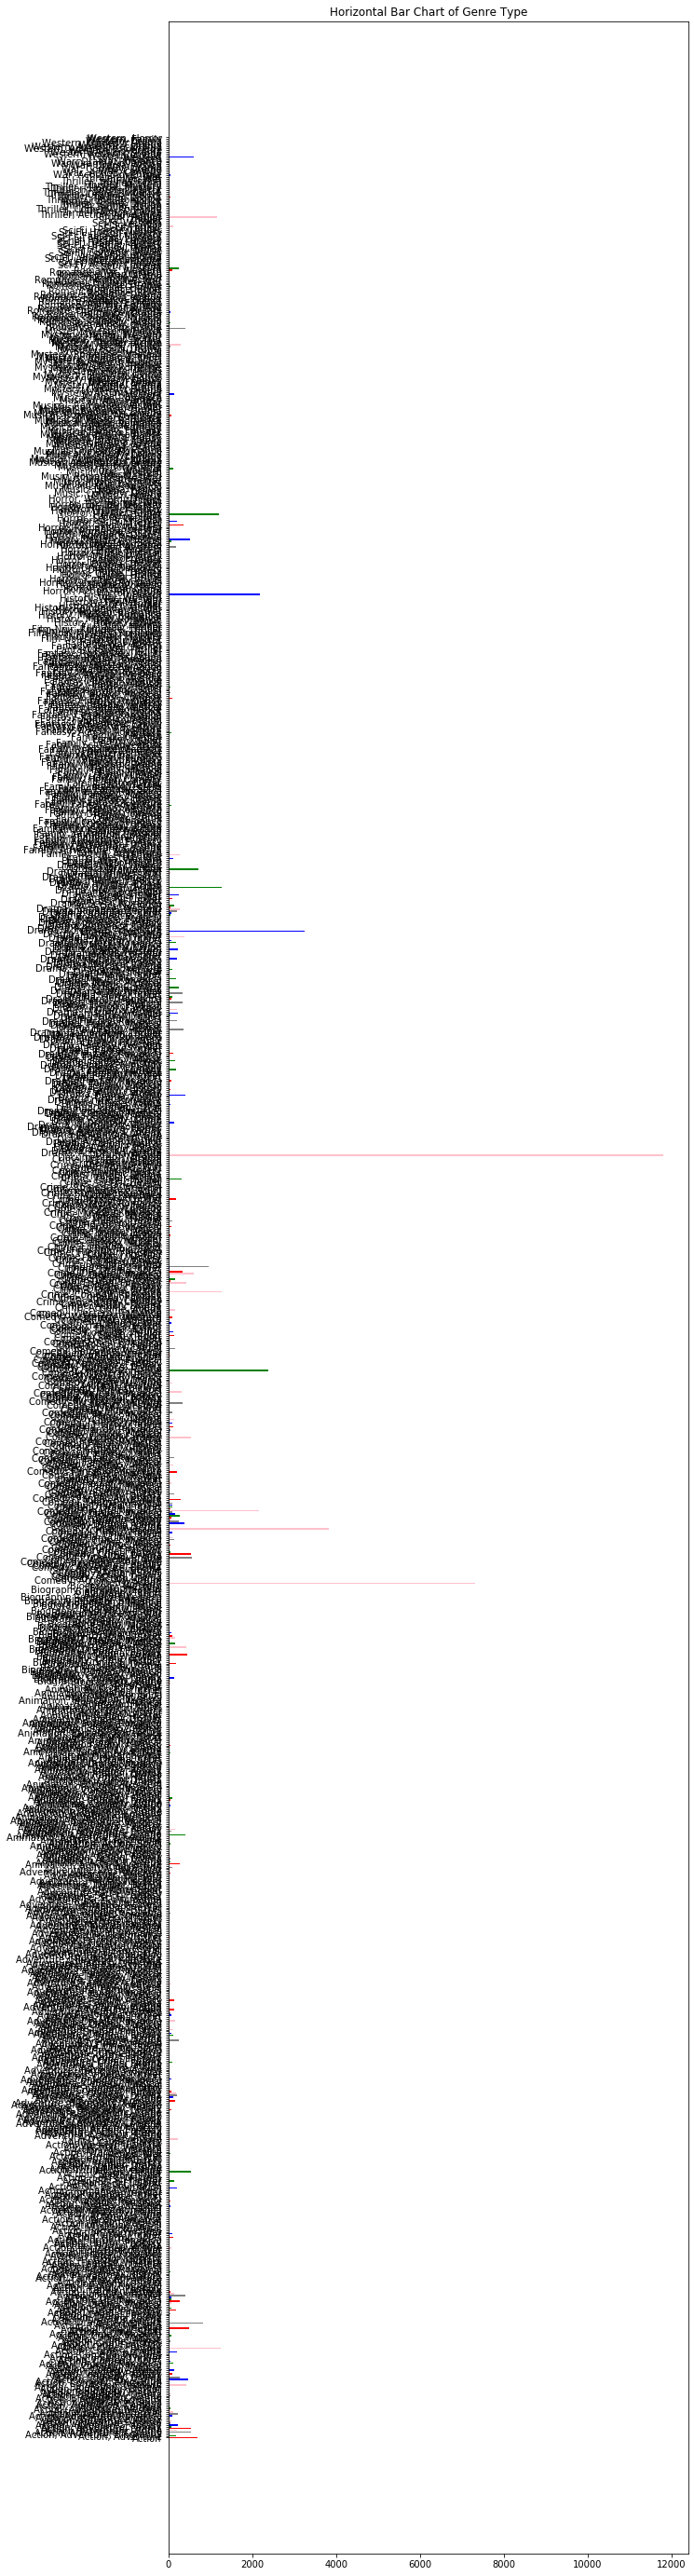

In [34]:
# bar chart of categorical variable 'genre'
plt.figure(figsize=(10,50))
plt.barh(movie_recs.groupby("genre")["genre"].count().index, 
        movie_recs.groupby("genre")["genre"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Horizontal Bar Chart of Genre Type")

plt.show()

## Genre Encoding


In [35]:
#Create a new column w/new genre list encoded as a list
movie_recs['genre_as_list'] = movie_recs['genre'].str.split(', ')

In [36]:
#addresses list through Counter.
#Counter is a dictionary
#https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
counter = Counter()
_ = movie_recs['genre_as_list'].apply(lambda row: counter.update(row))

In [37]:
for genre in counter.keys():
    movie_recs['is_' + genre.lower()] = movie_recs['genre_as_list'].apply(lambda x: genre in x).astype(int)

### Visuals: Horizontal Bar Chart of Simplified Genre Type

Text(0.5, 1.0, 'Horizontal Bar Chart of Simplified Genre Type')

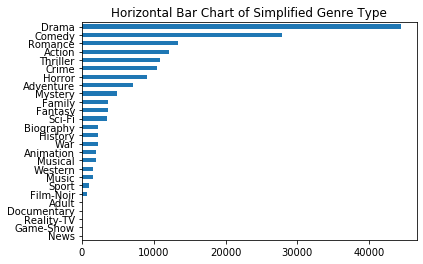

In [38]:
pd.Series(counter).sort_values(ascending=True).plot(kind='barh')
plt.title("Horizontal Bar Chart of Simplified Genre Type")
#Each movie will show up in simultaneous genre categories

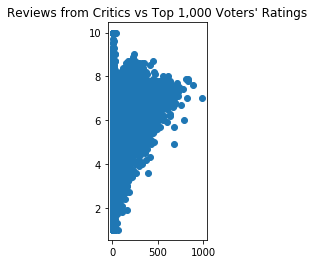

In [39]:
plt.subplot(1,3,1)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")
plt.show()

In [40]:
#Dummy Variables
columns_with_is = [x for x in movie_recs.columns if 'is_' in x]
columns_with_is_and_female_avg_vote = [x for x in movie_recs.columns if 'is_' in x or 'females_allages_avg_vote' in x]


In [41]:
columns_with_is

['is_biography',
 'is_crime',
 'is_drama',
 'is_history',
 'is_adventure',
 'is_fantasy',
 'is_romance',
 'is_war',
 'is_mystery',
 'is_horror',
 'is_western',
 'is_comedy',
 'is_family',
 'is_action',
 'is_sci-fi',
 'is_thriller',
 'is_sport',
 'is_animation',
 'is_musical',
 'is_music',
 'is_film-noir',
 'is_adult',
 'is_documentary',
 'is_reality-tv',
 'is_game-show',
 'is_news']

### Table: Females of All Ages' Average Votes Per Simplified Genres

In [42]:
#Try groupby
movie_recs.groupby('females_allages_avg_vote')[columns_with_is].sum()

,is_biography,is_crime,is_drama,is_history,is_adventure,is_fantasy,is_romance,is_war,is_mystery,is_horror,...,is_sport,is_animation,is_musical,is_music,is_film-noir,is_adult,is_documentary,is_reality-tv,is_game-show,is_news
females_allages_avg_vote,,,,,,,,,,,,,,,,,,,,,
1.0,4,11,56,2,7,4,13,1,2,11,...,0,1,1,0,0,0,0,0,0,0
1.1,0,5,3,0,3,5,4,0,0,6,...,0,0,1,0,0,0,0,0,0,0
1.2,0,3,11,1,4,3,3,0,0,6,...,2,1,0,1,0,0,0,0,0,0
1.3,0,5,15,0,5,4,1,1,1,7,...,0,1,0,1,0,0,0,0,0,0
1.4,0,6,8,1,7,1,3,1,1,8,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,1,1,11,0,0,1,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9.7,1,1,11,1,1,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9.8,0,3,9,0,0,0,4,0,0,0,...,2,0,0,0,0,0,0,0,0,0


### Visual: Genre Groupings

##Plot counts for newly reduced and reclassified combo of genre
sns.countplot(y="females_allages_avg_vote", hue="genre_1", data=movie_recs, palette="Greens_d")
plt.show()

In [43]:
movie_recs["females_allages_avg_vote"].head()

0    6.1
1    5.7
2    5.8
3    7.2
4    5.4
Name: females_allages_avg_vote, dtype: float64

In [44]:
movie_recs['females_allages_avg_vote']

0        6.1
1        5.7
2        5.8
3        7.2
4        5.4
        ... 
81268    5.8
81269    NaN
81270    NaN
81271    NaN
81272    1.0
Name: females_allages_avg_vote, Length: 81273, dtype: float64

In [45]:
#Looking at just "Romance" correlation
movie_recs[columns_with_is].corr()['is_romance']

is_biography     -0.040332
is_crime         -0.115037
is_drama          0.065334
is_history       -0.021889
is_adventure     -0.080447
is_fantasy       -0.037653
is_romance        1.000000
is_war           -0.004228
is_mystery       -0.065142
is_horror        -0.136368
is_western       -0.010511
is_comedy         0.090908
is_family        -0.064211
is_action        -0.123185
is_sci-fi        -0.071497
is_thriller      -0.130436
is_sport         -0.008284
is_animation     -0.063644
is_musical        0.076247
is_music          0.014291
is_film-noir     -0.030083
is_adult         -0.002202
is_documentary   -0.002202
is_reality-tv    -0.002202
is_game-show     -0.001557
is_news          -0.001557
Name: is_romance, dtype: float64

In [46]:
movie_recs[columns_with_is_and_female_avg_vote].corr()['females_allages_avg_vote']

females_allages_avg_vote    1.000000
is_biography                0.093994
is_crime                    0.025267
is_drama                    0.265728
is_history                  0.075557
is_adventure               -0.009797
is_fantasy                 -0.016627
is_romance                  0.073788
is_war                      0.063533
is_mystery                 -0.008838
is_horror                  -0.280769
is_western                  0.007952
is_comedy                  -0.014305
is_family                   0.023692
is_action                  -0.106021
is_sci-fi                  -0.121616
is_thriller                -0.127379
is_sport                    0.013370
is_animation                0.053703
is_musical                  0.043161
is_music                    0.044936
is_film-noir                0.055969
is_adult                   -0.004827
is_documentary              0.005833
is_reality-tv              -0.003357
is_game-show               -0.000944
is_news                     0.007894
N

### Observation: 
Overall, 'Romance' is mostly correlated with the 'Comedy' genre: .09; however this is a weak correlation. We see that the most highly positive correlated simplified genre for all women of all ages focusing on 'Romance" are films that fall into 'Drama'. Conversely, the most highly negative correlated simplified genre for all women of all ages selecting 'Romance' types are films that fall into 'Horror'. Generally, if women are picking 'Romance', then they are avoiding the 'Horror' genre. If they are looking for the 'Romance-Thriller' genre, and are equally likely to select 'Science Fiction' based on similarly negative correlations  of '-.127' and '-.121'. 

In [47]:
movie_recs[columns_with_is].corr()[['is_romance','is_news']]

,is_romance,is_news
is_biography,-0.040332,-0.000595
is_crime,-0.115037,-0.001348
is_drama,0.065334,-0.003850
is_history,-0.021889,-0.000582
is_adventure,-0.080447,-0.001084
is_fantasy,-0.037653,-0.000755
is_romance,1.000000,-0.001557
is_war,-0.004228,-0.000581
is_mystery,-0.065142,0.013941
is_horror,-0.136368,-0.001241


### Bivariate Analsysis: Categorical vs. Categorical 

### Crosstab

In [48]:
#Attempt 2 crosstabl
#movie_recs2 = pd.crosstab(movie_recs[[is)comed]], movie_recs["director"])  
pd.crosstab(movie_recs['is_drama'], movie_recs['females_allages_avg_vote'])

females_allages_avg_vote,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0
is_drama,,,,,,,,,,,,,,,,,,,,,
0,74,23,27,32,38,37,38,55,70,82,...,14,17,21,6,12,2,6,5,4,58
1,56,3,11,15,8,24,9,27,19,22,...,20,28,24,20,18,11,11,9,13,55


In [49]:
pd.crosstab(movie_recs['is_drama'], movie_recs['females_allages_avg_vote'])

females_allages_avg_vote,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0
is_drama,,,,,,,,,,,,,,,,,,,,,
0,74,23,27,32,38,37,38,55,70,82,...,14,17,21,6,12,2,6,5,4,58
1,56,3,11,15,8,24,9,27,19,22,...,20,28,24,20,18,11,11,9,13,55


In [50]:
movie_recs[columns_with_is]

,is_biography,is_crime,is_drama,is_history,is_adventure,is_fantasy,is_romance,is_war,is_mystery,is_horror,...,is_sport,is_animation,is_musical,is_music,is_film-noir,is_adult,is_documentary,is_reality-tv,is_game-show,is_news
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81269,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81270,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81271,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
movie_recs['director']

0                               Charles Tait
1                                  Urban Gad
2                         Charles L. Gaskill
3        Francesco Bertolini, Adolfo Padovan
4                              Sidney Olcott
                        ...                 
81268                        Aswani Kumar V.
81269                                    Zam
81270                          T.V. Chandran
81271                        Vineesh Aaradya
81272                      Ahmet Faik Akinci
Name: director, Length: 81273, dtype: object

Analysis: There are over 1,000 genre values. This variable is overwhelming, so we must reclassify to manage the values better. 

### Continuous vs. Categorical T-test

### Heatmaps

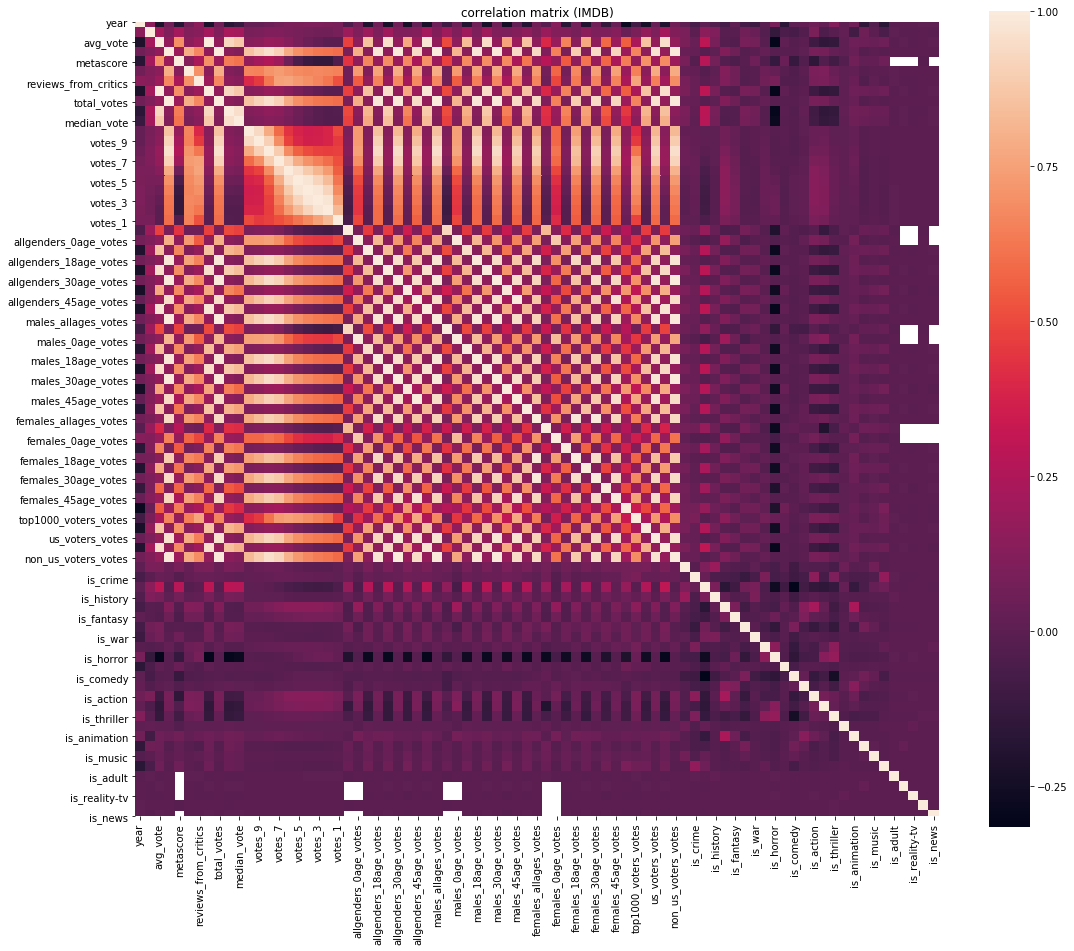

In [52]:
# make the correlation matrices.
corrmat_movie_recs = movie_recs.corr()

#corrmat_student = student_df.corr()

plt.figure(figsize=(18,15))

#plt.subplot(1,2,1) = (amount of rows, amount of columns, order of that graph)
# draw the heatmap using seaborn.
#sns.heatmap(corrmat_movie_recs, square=True, annot=True, linewidths=.9)
sns.heatmap(corrmat_movie_recs, square=True)
plt.title("correlation matrix (IMDB)")

plt.show()

In [53]:
movie_recs.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

## Model Preparation

In [31]:
# Focus on English movie titles.   
movie_recs_to_look = movie_recs1[movie_recs['language']=='English'].dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [66]:
movie_recs_to_cluster = movie_recs_to_look.drop(columns=['description','imdb_title_id', 'title', 
                                                         'original_title', 'date_published','duration', 'budget',
                                                         'usa_gross_income', 'worlwide_gross_income',
                                                         'reviews_from_users', 'reviews_from_critics', 'genre', 
                                                         'genre_as_list','avg_vote', 'votes','weighted_average_vote',
                                                         'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
                                                         'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
                                                         'votes_2', 'votes_1', 'allgenders_0age_avg_vote','allgenders_0age_votes', 'allgenders_18age_avg_vote',
                                                         'allgenders_18age_votes', 'allgenders_30age_avg_vote',
                                                         'allgenders_30age_votes', 'allgenders_45age_avg_vote',
                                                         'allgenders_45age_votes', 'males_allages_avg_vote',
                                                         'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
                                                         'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
                                                         'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes'])
movie_recs_to_cluster = movie_recs_to_cluster[movie_recs_to_cluster['language'] == 'English'].drop(columns='language')


In [24]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = oe.fit_transform(X_pca1)

#### Analysis: 
Note our dilemma of double and triple genre groupings create separate 'genre' listings apart from the one word value "drama", or "comedy", and "romance" to create additional genres of "drama-romance" and "comedy-romance" in producing five values rather than three.


## Form Cluster 2: DBSCAN Cluster

In [25]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=.3, min_samples=2).fit(X)

print(dbscan_recs.labels_)

#dbscan_recs

[-1 -1 -1 ... -1 -1 -1]


In [26]:
print(set(dbscan_recs.labels_))

{-1}


In [27]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=3, min_samples=5).fit(X)

print(dbscan_recs.labels_)

[-1 -1 -1 ... -1 -1 -1]


In [60]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=200, min_samples=2).fit(X)

print(set(dbscan_recs.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### Observation:
DBSCAN only produces over 100 clusters. 

In [28]:
X

array([[21771., 34690., 40116.],
       [13844., 37973., 44555.],
       [10560., 51711., 54730.],
       ...,
       [50917.,   371.,  2601.],
       [22811., 30586., 35644.],
       [55203.,   190.,  2275.]])

In [29]:
print(len(X_pca1))

66503


In [32]:
#Recommeding based on DBSCAN
# for_modeling['dbscan_recs.labels_'] = dbscan_recs.labels_
movie_recs_to_look['dbscan_recs'] = dbscan_recs.labels_

ValueError: Length of values does not match length of index

In [ ]:
movie_recs_to_look_pca[movie_recs_to_look_pca['dbscan_recs']==128]

## Form Clusters 3 : Agglomerrative

In [ ]:
# Use Agglomaerative Clustering 
    #class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)[source]
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=1000)

agg_cluster.fit(X) #_predict(X)


#### Analysis of Agglomerrative Cluster:
We see 1,000 clusters for the 80,000+ movie titles.

In [ ]:
agg_cluster_labels.shape

In [ ]:
agg_cluster.labels_.shape

In [ ]:
X.shape

In [ ]:
movie_recs_to_look[movie_recs_to_look['agg_cluster_labels']==128]

#### Analysis of Agglomerative Cluster:
We ran the agglomerative cluster to organize 1,000 clusters of movie title groupings that criss-cross along multiple genres. 

As such, we selected the same movie observation from the first, and second clustering techniques to produce two suggestions after running IMDB data set observation "128". Our agglomerative cluster suggested two movie titles based on similarties identified: "The Road to El Dorado" and "Paper Towns". Both overlap in the "comedy" genre. 

## Form Cluster 5: K-Means
We need to formulate a second cluster that groups genre films with females_allages_avg_vote

In [ ]:
## Form Cluster 5: K-Means
We need to formulate a second cluster that groups genre films with females_allages_avg_vote

#Try another cluster and look at Kaggle

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3)
X = movie_recs[[*columns_with_is, 'reviews_from_critics']] #use dummies 
#Y = movie_recs['title']
neighbors.fit(X,Y)

## Predict for a movie that is a comedy with a '4' rating.
neighbors.predict([['comedy',4]])

### Search a Film Title

In [ ]:
#Pass an 'X', film suggestion is 'Gigi' to get prediction/film rec.
#Find a film title: data[data.Title.str.contains('Dunkirk')]

movie_recs[movie_recs['title'].str.contains('GIGI', case=False)]

In [ ]:
#Here is a cluster of 10 suggestions
movie_recs[movie_recs['minibatch_kmeans_labels'] == 566].head(10)

## Evaluating Hyperparameter

## Summary Discussion:
1-Your end-user and the value your project provides to them.
2-Quantifiable results based on the research you’ve conducted.
3-The visuals you chose and what they represent for your research.
4-Next steps you'd take to expand on your work.
5-A specified research question your model addresses.
6-How you chose your model specification and what alternatives you compared it to.
7-The practical uses of your model for an audience of interest.
8-Any weak points or shortcomings of your model.